In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


## Using Kaggle dataset pulled from Zillow to predict housing prices
- Kaggle data source: https://www.kaggle.com/datasets/sheemazain/house-price-predication


In [47]:
data = pd.read_csv('data.csv')

#cleaning the data for decision tree
#need to remove non numerical data and convert use get_dummies to convert city to numerical values
data.drop(['date', 'street', 'statezip', 'country'], axis=1, inplace=True)
data = pd.get_dummies(data, columns=['city', 'bedrooms', 'bathrooms', 'floors'], dtype='int')
data.price = data.price.astype('int')
data.head()




,price,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,...,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,313000,1340,7912,0,0,3,1340,0,1955,2005,...,0,0,0,0,0,1,0,0,0,0
1,2384000,3650,9050,0,4,5,3370,280,1921,0,...,0,0,0,0,0,0,1,0,0,0
2,342000,1930,11947,0,0,4,1930,0,1966,0,...,0,0,0,0,1,0,0,0,0,0
3,420000,2000,8030,0,0,4,1000,1000,1963,0,...,0,0,0,0,1,0,0,0,0,0
4,550000,1940,10500,0,0,4,1140,800,1976,1992,...,0,0,0,0,1,0,0,0,0,0


In [38]:
#Creating data and labels to use in Decision Tree Classification
# data is defined above, so only need to create labels
#labels will be what were trying to predict, so the 'price' column

labels = data['price']


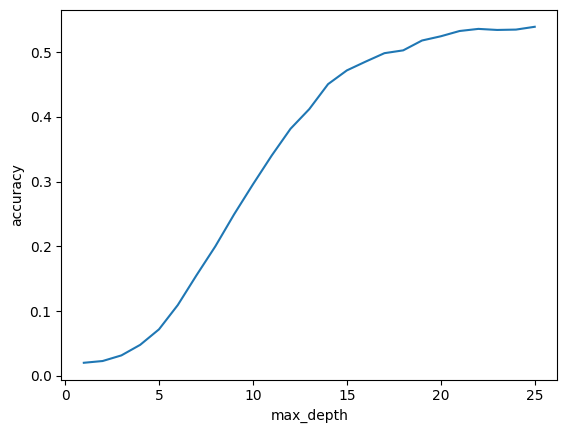

Highest accuracy 53.900000000000006% at depth 25


In [50]:
#creating training and test data split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1, test_size=.4)

#fit decision tree for max_depth values 1-25 and save the accuracy score to plot
depths = range(1, 26)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

Using the Decision Tree Classifier, the accuracy is only aroun 54% when attempting to predict the price which is not very good at all.  Perhaps we should try to predict something that is less variable such as floors

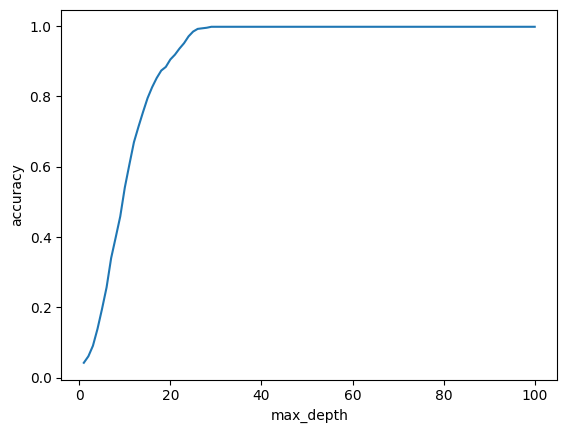

Highest accuracy 99.8% at depth 29


In [56]:
labels2 = data['yr_built']

#creating training and test data split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels2, random_state=1, test_size=.4)

#fit decision tree for max_depth values 1-25 and save the accuracy score to plot
depths = range(1, 101)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(train_data, train_labels)
    acc_depth.append(dt.score(test_data, test_labels))

#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')